# Import packages and Pre-define func

In [1]:
import csv
import numpy as np
import pandas as pd
import pip

def pip_install(module):
    pip.main(['install', module])

# pip_install('scipy')
# pip_install('matplotlib')

In [2]:
def prepare_data():
    raw_data = pd.read_csv('../../data/trade.csv')
    # count the number of vipno and pluno
    vip_set = set(raw_data.vipno)
    n_vip = len(vip_set)
    plu_set = set(raw_data.pluno)
    n_plu = len(plu_set)
    
    # construct the data matrix of the trade
    vipno = list(vip_set)
    pluno = list(plu_set)
    trade_mat = pd.DataFrame(np.zeros([n_plu, n_vip]), index=pluno, columns=vipno)
    l = len(raw_data)
    for i in range(l):
        p = raw_data.loc[i, 'pluno']
        v = raw_data.loc[i, 'vipno']
        a = raw_data.loc[i, 'amt']
        trade_mat.at[p, v] += a
        
    # apply round
    trade_mat.apply(np.round)
    trade_mat = trade_mat.astype('int64') # it depends
    return trade_mat, vipno, pluno, n_vip, n_plu

# Plot silhouette function

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np

def clustering(n_clusters, X):
# Create a subplot with 1 row and 2 columns
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = colors[i]
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    new_X = PCA(n_components=2, whiten=True).fit_transform(X)
    ax2.scatter(new_X[:, 0], new_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [5]:
# get the data for clustering
from sklearn.preprocessing import StandardScaler

trade_mat, vipno, pluno, n_vip, n_plu = prepare_data()
X = trade_mat.values
X = X.transpose()
# standarize
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
print("vip numer =", len(X))

vip numer = 298


Start analysis on silhouette value...
For n_clusters = 12 The average silhouette_score is : 0.359326340546279


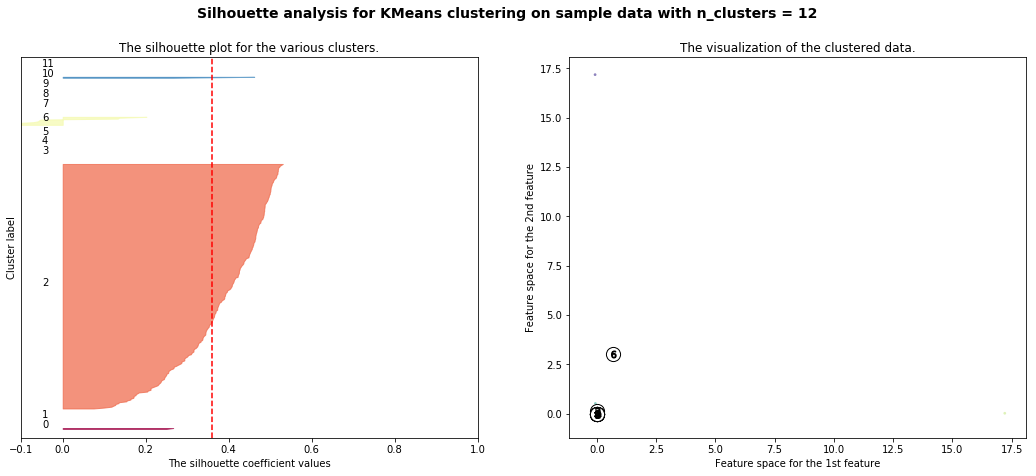

In [10]:
# plot the silhouette analysis results
print("Start analysis on silhouette value...")
n_cluster = int(np.sqrt(n_vip/2))
clustering(n_cluster, X)

# Tuning parameters, it is proved that the effect of clustering is not that good
# n_cluster = int(np.sqrt(n_vip/2))
# for k in range(2, n_cluster):
#     clustering(k, X)

# n_cluster = int(np.sqrt(n_vip/2))
# for k in range(n_cluster, 2*n_cluster):
#     clustering(k, X)

# (a) Silhouette coefficient - k cluster plot

In [7]:
from scipy.interpolate import interp1d

def cluster_eva(X, n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    return silhouette_avg, cluster_labels

In [8]:
k = n_cluster = int(np.sqrt(n_vip/2))
print("The init value of n_cluster is {}".format(k))

ks = []
y = []
labels = []
for i in range(2,2*k):
    ks.append(i)
    sil_avg, cluster_labels = cluster_eva(X, i)
    y.append(sil_avg)
    labels.append(cluster_labels)

The init value of n_cluster is 12
For n_clusters = 2 The average silhouette_score is : 0.941061685106038
For n_clusters = 3 The average silhouette_score is : 0.8632761084181174
For n_clusters = 4 The average silhouette_score is : 0.3107168633161139
For n_clusters = 5 The average silhouette_score is : 0.7797676692594403
For n_clusters = 6 The average silhouette_score is : 0.6329520193123459
For n_clusters = 7 The average silhouette_score is : 0.5900157269241005
For n_clusters = 8 The average silhouette_score is : 0.25374883940450665
For n_clusters = 9 The average silhouette_score is : 0.3730460226753575
For n_clusters = 10 The average silhouette_score is : 0.3732203751898072
For n_clusters = 11 The average silhouette_score is : 0.2975942336546988
For n_clusters = 12 The average silhouette_score is : 0.359326340546279
For n_clusters = 13 The average silhouette_score is : 0.361458361618785
For n_clusters = 14 The average silhouette_score is : 0.36249675469689774
For n_clusters = 15 The av

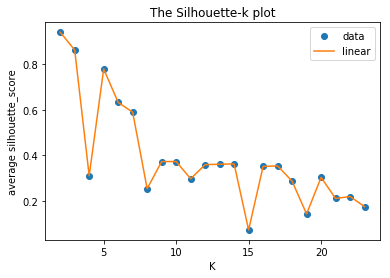

In [9]:
f = interp1d(ks, y)

xnew = ks.copy()
plt.plot(ks, y, 'o', xnew, f(xnew), '-')
plt.legend(['data', 'linear'], loc='best')
plt.title("The Silhouette-k plot")
plt.xlabel("K")
plt.ylabel("average silhouette_score")
plt.show()

# (b) Test with LSH

In [11]:
from lshash.lshash import LSHash

print("Start test with lshash...")
e = 0.01
lsh = LSHash(round(n_vip * e), n_plu)
for v in vipno:
    feature = list(trade_mat[v])
    lsh.index(feature, extra_data=v)

Start test with lshash...


In [21]:
import random

k = 6

def lsh_test():
    correct = 0
    # pick up a random vipno
    pick_vip = random.randint(0, n_vip)
    cluster_label = labels[k]
    pick_vipno = vipno[pick_vip]
    cluster1 = cluster_label[pick_vip]
    print("Pick up a vip: {0}, cluster = {1}".format(pick_vipno, cluster1))

    # lsh query and write the results
    candi = lsh.query(list(trade_mat[pick_vipno]))
    l = len(candi)
    for i, item in enumerate(candi[1:]):
        dist = item[1]
        feature = list(item[0][0])
        v = item[0][1]
        lsh_pair_no = vipno.index(v)
        cluster2 = cluster_label[lsh_pair_no]
#         print("for vip {0}: distance = {1}, cluster = {2}".format(v, dist, cluster2))
        if cluster2 == cluster1:
            correct += 1
    print("accuracy =", correct, '/', l)
    return correct/float(l)

In [26]:
correctness = 0
times = 50
for i in range(times):
    print("Time #", i+1)
    correctness += lsh_test()
print("The total average accuracy is =", correctness / times)

Time # 1
Pick up a vip: 2900001538596, cluster = 2
accuracy = 25 / 29
Time # 2
Pick up a vip: 1591140691788, cluster = 2
accuracy = 32 / 33
Time # 3
Pick up a vip: 1595150071417, cluster = 2
accuracy = 34 / 35
Time # 4
Pick up a vip: 1590142516563, cluster = 2
accuracy = 29 / 31
Time # 5
Pick up a vip: 2900000208902, cluster = 2
accuracy = 25 / 29
Time # 6
Pick up a vip: 1591014097494, cluster = 2
accuracy = 23 / 25
Time # 7
Pick up a vip: 2900001465960, cluster = 2
accuracy = 59 / 69
Time # 8
Pick up a vip: 1591016561351, cluster = 2
accuracy = 23 / 25
Time # 9
Pick up a vip: 1590151300269, cluster = 2
accuracy = 23 / 25
Time # 10
Pick up a vip: 2900002932416, cluster = 2
accuracy = 34 / 35
Time # 11
Pick up a vip: 2900002932416, cluster = 2
accuracy = 34 / 35
Time # 12
Pick up a vip: 1592015013285, cluster = 2
accuracy = 44 / 49
Time # 13
Pick up a vip: 1590142434362, cluster = 2
accuracy = 26 / 27
Time # 14
Pick up a vip: 2900003122434, cluster = 2
accuracy = 29 / 31
Time # 15
Pick 